# Graph Analysis Techniques without Feature Learning

# Dimensionality reduction with graphs

## Lab 1 : Standard/Linear PCA

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML2023_codes/codes/03_Traditional_GML/04_dim_reduc'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import helper functions
%load_ext autoreload
%autoreload 2

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import
import scipy.sparse.linalg
import time
import scipy.ndimage
from lib.utils import compute_pca

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data matrix 
mat = scipy.io.loadmat('datasets/ellipsoide_standardpca.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
print(n,d)

1000 100


In [4]:
# Zero-centered data
Xzc = X - np.mean(X,axis=0) 

# Covariance matrix
CovX = (Xzc.T).dot(Xzc) 

# Compute largest 5 eigenvectors/eigenvalues
nb_pca = 5
CovX = scipy.sparse.csr_matrix(CovX)
lamb, U = scipy.sparse.linalg.eigsh(CovX, k=nb_pca, which='LM') # U = d x nb_pca
EVec = U[:,::-1] # largest = index 0
EVal = lamb[::-1]

# Principal Components
Xpc = X.dot(EVec)

# Principal Directions
v1 = EVec[:2,0]
v2 = EVec[:2,1]
print(v1,v2,EVal[:2])

[ 0.70863799 -0.70556637] [0.7054969  0.70856204] [96060.34052869  3764.49978288]


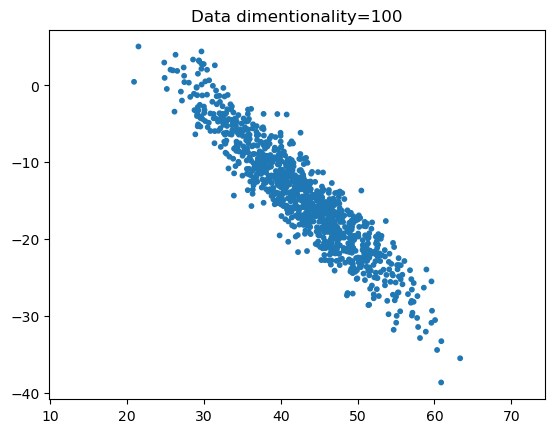

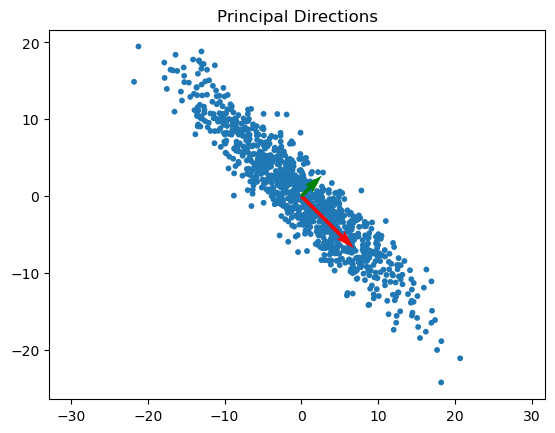

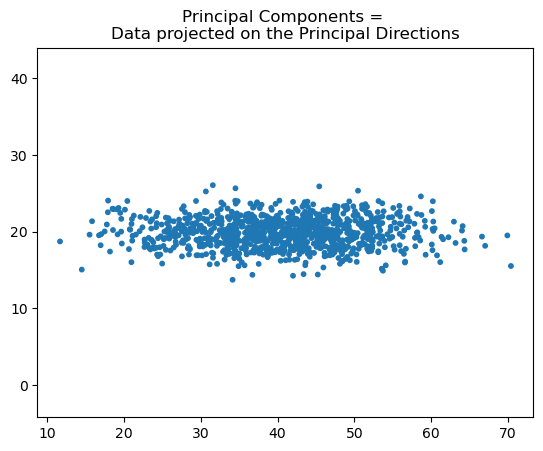

In [5]:
plt.figure(1)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n))
plt.title('Data dimentionality=' + str(d))
plt.axis('equal')
plt.show()

plt.figure(2)
size_vertex_plot = 10
plt.scatter(Xzc[:,0], Xzc[:,1], s=size_vertex_plot*np.ones(n))
k=0; p=1.* EVal[k]/ 10000.* v1
plt.quiver(0.0, 0.0, p[0], p[1], scale=1., units='xy', color='r') 
k=1; p=1.* EVal[k]/ 1000.* v2
plt.quiver(0.0, 0.0, p[0], p[1], scale=1., units='xy', color='g') 
plt.title('Principal Directions')
plt.axis('equal')
plt.show()

plt.figure(3)
size_vertex_plot = 10
plt.scatter(Xpc[:,0], Xpc[:,1], s=size_vertex_plot*np.ones(n))
plt.title('Principal Components = \nData projected on the Principal Directions')
plt.axis('equal')
plt.show()